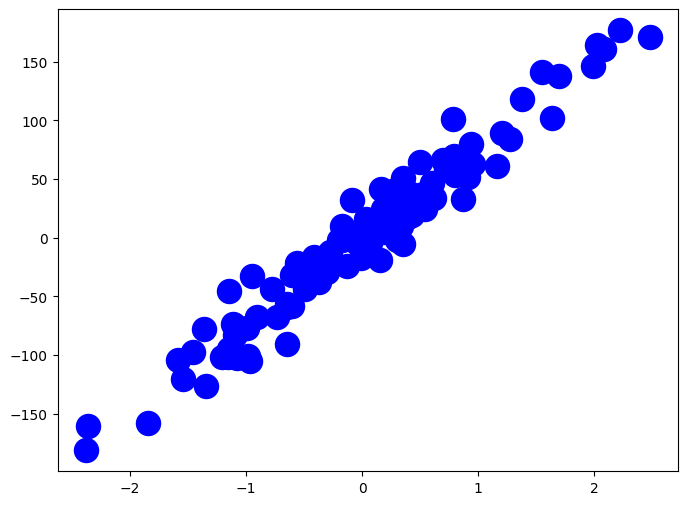

783.815546512549


In [10]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt
x,y=datasets.make_regression(n_samples=100,n_features=1, noise=20, random_state=4)
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2, random_state=1234)
fig=plt.figure(figsize=(8,6))
plt.scatter(x[:,0],y, color="b", marker="o", s=300)
plt.show()

class LinearRegression:
    def __init__(self, lr=0.001, n_iters=1000):  # FIX: Corrected `__init__`
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters): 
            y_pred = np.dot(X, self.weights) + self.bias
            dw = (1/n_samples) * np.dot(X.T, (y_pred - y))  # FIX: Corrected gradient
            db = (1/n_samples) * np.sum(y_pred - y)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias  # FIX: Ensured return is correct


reg=LinearRegression()
reg.fit(x_train,y_train)
prediction=reg.predict(x_test)

def mse(y_test,predictions):
  return np.mean((y_test-predictions)**2)

mse=mse(y_test,prediction)
print(mse)